# Crime in Context, 1975-2015
 ### Are violent crime rates rising or falling in American cities?

#### Source of Data:
The dataset is published by The Marshall Project.
It covers crime records in the United States from 1975 to 2015.
#### Scope of Data:
Contains over 40 years of crime information.
Includes 68 police jurisdictions with populations of 250,000 or more.
#### Crime Categories Covered:
- Homicide
- Rape
- Robbery
- Assault
Along with total violent crimes and crime rates for each jurisdiction.
#### Objective of the Analysis:
To explore long-term trends and patterns in violent crimes.
To identify fluctuations, peaks, and declines over time.
To compare crime rates between different cities or regions.
To gain insights into social, economic, and law enforcement factors affecting crime trends.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings('ignore')
df=pd.read_csv('report.csv')
df


report_year agency_code agency_jurisdiction  population  violent_crimes  \
0            1975     NM00101     Albuquerque, NM    286238.0          2383.0   
1            1975     TX22001       Arlington, TX    112478.0           278.0   
2            1975     GAAPD00         Atlanta, GA    490584.0          8033.0   
3            1975     CO00101          Aurora, CO    116656.0           611.0   
4            1975     TX22701          Austin, TX    300400.0          1215.0   
...           ...         ...                 ...         ...             ...   
2824         2015     OK07205           Tulsa, OK    401520.0          3628.0   
2825         2015     VA12800  Virginia Beach, VA    452797.0           626.0   
2826         2015     DCMPD00      Washington, DC    672228.0          8084.0   
2827         2015     KS08703         Wichita, KS    389824.0          3839.0   
2828         2015         NaN       United States         NaN       1197704.0   

      homicides  rapes  assaults  robberies  months_reported  \
0          30.0  181.0    1353.0      819.0             12.0   
1           5.0   28.0     132.0      113.0             12.0   
2         185.0  443.0    3518.0     3887.0             12.0   
3           7.0   44.0     389.0      171.0             12.0   
4          33.0  190.0     463.0      529.0             12.0   
...         ...    ...       ...        ...              ...   
2824       55.0  365.0    2354.0      854.0              NaN   
2825       19.0  103.0     234.0      270.0              NaN   
2826      162.0  494.0    4024.0     3404.0              NaN   
2827       27.0  349.0    2730.0      733.0              NaN   
2828    15696.0    NaN       NaN        NaN              NaN   

      crimes_percapita  homicides_percapita  rapes_percapita  \
0               832.52                10.48            63.23   
1               247.16                 4.45            24.89   
2              1637.44                37.71            90.30   
3               523.76                 6.00            37.72   
4               404.46                10.99            63.25   
...                ...                  ...              ...   
2824            903.57                13.70            90.90   
2825            138.25                 4.20            22.75   
2826           1202.57                24.10            73.49   
2827            984.80                 6.93            89.53   
2828            372.60                 4.90              NaN   

      assaults_percapita  robberies_percapita  
0                 472.68               286.13  
1                 117.36               100.46  
2                 717.10               792.32  
3                 333.46               146.58  
4                 154.13               176.10  
...                  ...                  ...  
2824              586.27               212.69  
2825               51.68                59.63  
2826              598.61               506.38  
2827              700.32               188.03  
2828                 NaN                  NaN  

[2829 rows x 15 columns]

##  lets dive into the dataset 

* **report_year:** The year in which the crime data was reported.
* **agency_code:** A unique identification code for each law enforcement agency.
* **agency_jurisdiction:** The name of the area or city covered by the reporting agency.
* **population:** The total number of people living in that agency’s jurisdiction.
* **violent_crimes:** The total count of all violent crimes reported by the agency.
* **homicides:** The number of murder or manslaughter cases reported.
* **rapes:** The number of rape cases reported.
* **assaults:** The number of aggravated assault incidents reported.
* **robberies:** The number of robbery cases reported.
* **months_reported:** The number of months in the year for which data was submitted.
* **crimes_percapita:** The rate of violent crimes per 100,000 people.
* **homicides_percapita:** The rate of homicides per 100,000 people.
* **rapes_percapita:** The rate of rapes per 100,000 people.
* **assaults_percapita:** The rate of assaults per 100,000 people.
* **robberies_percapita:** The rate of robberies per 100,000 people.


# Quick checks

In [3]:
df.shape

(2829, 15)

In [4]:
df.dtypes

report_year              int64
agency_code             object
agency_jurisdiction     object
population             float64
violent_crimes         float64
homicides              float64
rapes                  float64
assaults               float64
robberies              float64
months_reported        float64
crimes_percapita       float64
homicides_percapita    float64
rapes_percapita        float64
assaults_percapita     float64
robberies_percapita    float64
dtype: object

In [5]:
df.head()

report_year agency_code agency_jurisdiction  population  violent_crimes  \
0         1975     NM00101     Albuquerque, NM    286238.0          2383.0   
1         1975     TX22001       Arlington, TX    112478.0           278.0   
2         1975     GAAPD00         Atlanta, GA    490584.0          8033.0   
3         1975     CO00101          Aurora, CO    116656.0           611.0   
4         1975     TX22701          Austin, TX    300400.0          1215.0   

   homicides  rapes  assaults  robberies  months_reported  crimes_percapita  \
0       30.0  181.0    1353.0      819.0             12.0            832.52   
1        5.0   28.0     132.0      113.0             12.0            247.16   
2      185.0  443.0    3518.0     3887.0             12.0           1637.44   
3        7.0   44.0     389.0      171.0             12.0            523.76   
4       33.0  190.0     463.0      529.0             12.0            404.46   

   homicides_percapita  rapes_percapita  assaults_percapita  \
0                10.48            63.23              472.68   
1                 4.45            24.89              117.36   
2                37.71            90.30              717.10   
3                 6.00            37.72              333.46   
4                10.99            63.25              154.13   

   robberies_percapita  
0               286.13  
1               100.46  
2               792.32  
3               146.58  
4               176.10

In [6]:
df.tail()

report_year agency_code agency_jurisdiction  population  violent_crimes  \
2824         2015     OK07205           Tulsa, OK    401520.0          3628.0   
2825         2015     VA12800  Virginia Beach, VA    452797.0           626.0   
2826         2015     DCMPD00      Washington, DC    672228.0          8084.0   
2827         2015     KS08703         Wichita, KS    389824.0          3839.0   
2828         2015         NaN       United States         NaN       1197704.0   

      homicides  rapes  assaults  robberies  months_reported  \
2824       55.0  365.0    2354.0      854.0              NaN   
2825       19.0  103.0     234.0      270.0              NaN   
2826      162.0  494.0    4024.0     3404.0              NaN   
2827       27.0  349.0    2730.0      733.0              NaN   
2828    15696.0    NaN       NaN        NaN              NaN   

      crimes_percapita  homicides_percapita  rapes_percapita  \
2824            903.57                13.70            90.90   
2825            138.25                 4.20            22.75   
2826           1202.57                24.10            73.49   
2827            984.80                 6.93            89.53   
2828            372.60                 4.90              NaN   

      assaults_percapita  robberies_percapita  
2824              586.27               212.69  
2825               51.68                59.63  
2826              598.61               506.38  
2827              700.32               188.03  
2828                 NaN                  NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

In [8]:
df.columns.tolist()

['report_year',
 'agency_code',
 'agency_jurisdiction',
 'population',
 'violent_crimes',
 'homicides',
 'rapes',
 'assaults',
 'robberies',
 'months_reported',
 'crimes_percapita',
 'homicides_percapita',
 'rapes_percapita',
 'assaults_percapita',
 'robberies_percapita']

In [9]:
df.describe(include='all')

report_year agency_code agency_jurisdiction    population  \
count   2829.000000        2788                2829  2.760000e+03   
unique          NaN          68                  69           NaN   
top             NaN     NM00101     Albuquerque, NM           NaN   
freq            NaN          41                  41           NaN   
mean    1995.000000         NaN                 NaN  7.956981e+05   
std       11.834251         NaN                 NaN  1.012451e+06   
min     1975.000000         NaN                 NaN  1.007630e+05   
25%     1985.000000         NaN                 NaN  3.779310e+05   
50%     1995.000000         NaN                 NaN  5.366145e+05   
75%     2005.000000         NaN                 NaN  8.168558e+05   
max     2015.000000         NaN                 NaN  8.550861e+06   

        violent_crimes     homicides        rapes      assaults  \
count     2.794000e+03   2795.000000  2754.000000   2753.000000   
unique             NaN           NaN          NaN           NaN   
top                NaN           NaN          NaN           NaN   
freq               NaN           NaN          NaN           NaN   
mean      2.963255e+04    398.385331   416.278867   4405.146023   
std       1.728630e+05   2281.276402   479.811934   6977.293769   
min       1.540000e+02      1.000000    15.000000     15.000000   
25%       3.014750e+03     32.000000   176.250000   1467.000000   
50%       5.135500e+03     64.000000   291.000000   2597.000000   
75%       9.058500e+03    131.000000   465.000000   4556.000000   
max       1.932274e+06  24703.000000  3899.000000  71030.000000   

            robberies  months_reported  crimes_percapita  homicides_percapita  \
count     2754.000000      2692.000000       2794.000000          2795.000000   
unique            NaN              NaN               NaN                  NaN   
top               NaN              NaN               NaN                  NaN   
freq              NaN              NaN               NaN                  NaN   
mean      4000.245098        11.868871       1093.049810            15.372812   
std       8653.902965         1.118194        676.884678            12.350640   
min         83.000000         0.000000         16.490000             0.210000   
25%       1032.000000        12.000000        625.082500             6.955000   
50%       1940.000000        12.000000        949.680000            11.980000   
75%       3609.750000        12.000000       1409.507500            20.230000   
max     107475.000000        12.000000       4352.830000            94.740000   

        rapes_percapita  assaults_percapita  robberies_percapita  
count       2754.000000         2753.000000          2754.000000  
unique              NaN                 NaN                  NaN  
top                 NaN                 NaN                  NaN  
freq                NaN                 NaN                  NaN  
mean          59.305167          566.595434           459.968112  
std           31.971570          369.436996           340.903534  
min            1.640000            1.610000            11.460000  
25%           35.775000          319.090000           210.242500  
50%           55.900000          487.480000           374.400000  
75%           77.797500          728.240000           612.005000  
max          199.300000         2368.220000          2337.520000

# understanding the columns 

In [7]:
df['agency_jurisdiction'].unique()

array(['Albuquerque, NM', 'Arlington, TX', 'Atlanta, GA', 'Aurora, CO',
       'Austin, TX', 'Baltimore County, MD', 'Baltimore, MD',
       'Boston, MA', 'Buffalo, NY', 'Charlotte, NC', 'Chicago, IL',
       'Cincinnati, OH', 'Cleveland, OH', 'Columbus, OH', 'Dallas, TX',
       'Denver, CO', 'Detroit, MI', 'El Paso, TX', 'Fairfax County, VA',
       'Fort Worth, TX', 'Fresno, CA', 'Honolulu, HI', 'Houston, TX',
       'Indianapolis, IN', 'Jacksonville, FL', 'Kansas City, MO',
       'Las Vegas, NV', 'Long Beach, CA', 'Los Angeles County, CA',
       'Los Angeles, CA', 'Louisville, KY', 'Memphis, TN', 'Mesa, AZ',
       'Miami-Dade County, FL', 'Miami, FL', 'Milwaukee, WI',
       'Minneapolis, MN', 'Montgomery County, MD', 'Nashville, TN',
       'Nassau County, NY', 'New Orleans, LA', 'New York City, NY',
       'Newark, NJ', 'Oakland, CA', 'Oklahoma City, OK', 'Omaha, NE',
       'Orlando, FL', 'Philadelphia, PA', 'Phoenix, AZ', 'Pittsburgh, PA',
       'Portland, OR', "Prince Geor

- needs to split state and city 

In [4]:
df['report_year'].unique()

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [11]:
#statistical summary of the numerical datatypes
df.describe().T


count           mean           std        min  \
report_year          2829.0    1995.000000  1.183425e+01    1975.00   
population           2760.0  795698.089130  1.012451e+06  100763.00   
violent_crimes       2794.0   29632.545097  1.728630e+05     154.00   
homicides            2795.0     398.385331  2.281276e+03       1.00   
rapes                2754.0     416.278867  4.798119e+02      15.00   
assaults             2753.0    4405.146023  6.977294e+03      15.00   
robberies            2754.0    4000.245098  8.653903e+03      83.00   
months_reported      2692.0      11.868871  1.118194e+00       0.00   
crimes_percapita     2794.0    1093.049810  6.768847e+02      16.49   
homicides_percapita  2795.0      15.372812  1.235064e+01       0.21   
rapes_percapita      2754.0      59.305167  3.197157e+01       1.64   
assaults_percapita   2753.0     566.595434  3.694370e+02       1.61   
robberies_percapita  2754.0     459.968112  3.409035e+02      11.46   

                             25%        50%          75%         max  
report_year            1985.0000    1995.00    2005.0000     2015.00  
population           377931.0000  536614.50  816855.7500  8550861.00  
violent_crimes         3014.7500    5135.50    9058.5000  1932274.00  
homicides                32.0000      64.00     131.0000    24703.00  
rapes                   176.2500     291.00     465.0000     3899.00  
assaults               1467.0000    2597.00    4556.0000    71030.00  
robberies              1032.0000    1940.00    3609.7500   107475.00  
months_reported          12.0000      12.00      12.0000       12.00  
crimes_percapita        625.0825     949.68    1409.5075     4352.83  
homicides_percapita       6.9550      11.98      20.2300       94.74  
rapes_percapita          35.7750      55.90      77.7975      199.30  
assaults_percapita      319.0900     487.48     728.2400     2368.22  
robberies_percapita     210.2425     374.40     612.0050     2337.52

## categorical split 

In [16]:
# categorical split
df[['city','state']] = df['agency_jurisdiction'] \
.str.split(',', expand=True)

# Drop the original column
df = df.drop(columns=['agency_jurisdiction'])

cols = df.columns.tolist()

cols = [cols[0], 'city', 'state'] + [col for col in cols[1:] if col not in ['city', 'state']]
df = df[cols]
df

report_year            city state agency_code  population  \
0            1975     Albuquerque    NM     NM00101    286238.0   
1            1975       Arlington    TX     TX22001    112478.0   
2            1975         Atlanta    GA     GAAPD00    490584.0   
3            1975          Aurora    CO     CO00101    116656.0   
4            1975          Austin    TX     TX22701    300400.0   
...           ...             ...   ...         ...         ...   
2824         2015           Tulsa    OK     OK07205    401520.0   
2825         2015  Virginia Beach    VA     VA12800    452797.0   
2826         2015      Washington    DC     DCMPD00    672228.0   
2827         2015         Wichita    KS     KS08703    389824.0   
2828         2015   United States  None         NaN         NaN   

      violent_crimes  homicides  rapes  assaults  robberies  months_reported  \
0             2383.0       30.0  181.0    1353.0      819.0             12.0   
1              278.0        5.0   28.0     132.0      113.0             12.0   
2             8033.0      185.0  443.0    3518.0     3887.0             12.0   
3              611.0        7.0   44.0     389.0      171.0             12.0   
4             1215.0       33.0  190.0     463.0      529.0             12.0   
...              ...        ...    ...       ...        ...              ...   
2824          3628.0       55.0  365.0    2354.0      854.0              NaN   
2825           626.0       19.0  103.0     234.0      270.0              NaN   
2826          8084.0      162.0  494.0    4024.0     3404.0              NaN   
2827          3839.0       27.0  349.0    2730.0      733.0              NaN   
2828       1197704.0    15696.0    NaN       NaN        NaN              NaN   

      crimes_percapita  homicides_percapita  rapes_percapita  \
0               832.52                10.48            63.23   
1               247.16                 4.45            24.89   
2              1637.44                37.71            90.30   
3               523.76                 6.00            37.72   
4               404.46                10.99            63.25   
...                ...                  ...              ...   
2824            903.57                13.70            90.90   
2825            138.25                 4.20            22.75   
2826           1202.57                24.10            73.49   
2827            984.80                 6.93            89.53   
2828            372.60                 4.90              NaN   

      assaults_percapita  robberies_percapita  
0                 472.68               286.13  
1                 117.36               100.46  
2                 717.10               792.32  
3                 333.46               146.58  
4                 154.13               176.10  
...                  ...                  ...  
2824              586.27               212.69  
2825               51.68                59.63  
2826              598.61               506.38  
2827              700.32               188.03  
2828                 NaN                  NaN  

[2829 rows x 16 columns]

In [12]:
# statistical summary of the non-numeric types
df.describe(exclude=np.number).T

count unique              top freq
agency_code          2788     68          NM00101   41
agency_jurisdiction  2829     69  Albuquerque, NM   41

# 1. Data cleaning
## Missing values

In [17]:
df.isna().sum().sort_values(ascending=False)


months_reported        137
assaults                76
assaults_percapita      76
rapes                   75
robberies               75
robberies_percapita     75
rapes_percapita         75
population              69
state                   41
agency_code             41
crimes_percapita        35
violent_crimes          35
homicides               34
homicides_percapita     34
city                     0
report_year              0
dtype: int64

##  Insights
#### the data on types of crime that are missing from the dataset almost occur together
This gives us a succint way to deal with the null values
If a row is missing most of its crime data, it means that the agency didn’t report crimes for that year, so there’s nothing meaningful to analyze about crime levels there.

- In that case, it’s better to remove those rows, because we can’t study crime patterns, trends, or rates without actual crime numbers.

## checking null values in assaults 

In [18]:
df[df['assaults'].isnull()]

report_year              city state agency_code  population  \
30           1975        Louisville    KY     KY05680         NaN   
68           1975     United States  None         NaN         NaN   
99           1976        Louisville    KY     KY05680         NaN   
137          1976     United States  None         NaN         NaN   
168          1977        Louisville    KY     KY05680         NaN   
...           ...               ...   ...         ...         ...   
2759         2014     United States  None         NaN         NaN   
2765         2015  Baltimore County    MD     MD00301    828871.0   
2772         2015         Cleveland    OH     OHCLP00    388655.0   
2810         2015          Portland    OR     OR02602    615672.0   
2828         2015     United States  None         NaN         NaN   

      violent_crimes  homicides  rapes  assaults  robberies  months_reported  \
30               NaN        NaN    NaN       NaN        NaN              NaN   
68         1039710.0    20510.0    NaN       NaN        NaN              NaN   
99               NaN        NaN    NaN       NaN        NaN              NaN   
137        1004210.0    18780.0    NaN       NaN        NaN              NaN   
168              NaN        NaN    NaN       NaN        NaN              NaN   
...              ...        ...    ...       ...        ...              ...   
2759       1153022.0    14164.0    NaN       NaN        NaN              NaN   
2765             NaN        NaN    NaN       NaN        NaN              NaN   
2772             NaN        NaN    NaN       NaN        NaN              NaN   
2810             NaN        NaN    NaN       NaN        NaN              NaN   
2828       1197704.0    15696.0    NaN       NaN        NaN              NaN   

      crimes_percapita  homicides_percapita  rapes_percapita  \
30                 NaN                  NaN              NaN   
68               487.8                  9.6              NaN   
99                 NaN                  NaN              NaN   
137              467.8                  8.7              NaN   
168                NaN                  NaN              NaN   
...                ...                  ...              ...   
2759             361.6                  4.4              NaN   
2765               NaN                  NaN              NaN   
2772               NaN                  NaN              NaN   
2810               NaN                  NaN              NaN   
2828             372.6                  4.9              NaN   

      assaults_percapita  robberies_percapita  
30                   NaN                  NaN  
68                   NaN                  NaN  
99                   NaN                  NaN  
137                  NaN                  NaN  
168                  NaN                  NaN  
...                  ...                  ...  
2759                 NaN                  NaN  
2765                 NaN                  NaN  
2772                 NaN                  NaN  
2810                 NaN                  NaN  
2828                 NaN                  NaN  

[76 rows x 16 columns]

## Insights


Whenever one crime column (like assaults) is missing,
the other crime columns (rapes, robberies, etc.) are also missing in the same row.

since all the missingnull values occur together , we don't need to check the crime col seperately
we can handle them at all once using a simple rule

# deleting rows
Using the dropna fucntion with the parameter how = 'all' to ensure that the rows that have all the rows mentioned in the subset as null are deleted.

In [19]:
# Dropping rows where all major crime columns are missing 
# (Assaults, Rapes, Robberies). Other columns like population 
# or agency_code are not essential for this step.
df.dropna(subset=['assaults','assaults_percapita','rapes','rapes_percapita','robberies_percapita','robberies'], how='all', inplace=True)


In [20]:
df.isnull().sum().sort_values(ascending=False)

months_reported        65
violent_crimes          1
assaults                1
crimes_percapita        1
assaults_percapita      1
report_year             0
state                   0
city                    0
rapes                   0
homicides               0
population              0
agency_code             0
robberies               0
homicides_percapita     0
rapes_percapita         0
robberies_percapita     0
dtype: int64

### note:
I excluded the **`months_reported`** column because it’s not an actual crime metric — it only shows how many months data was reported, so its missing values don’t affect crime analysis.


# onto the months_reported column

In [21]:
df[df['months_reported'].isnull()]

report_year            city state agency_code  population  \
2760         2015     Albuquerque    NM     NM00101    559721.0   
2761         2015       Arlington    TX     TX22001    387565.0   
2762         2015         Atlanta    GA     GAAPD00    464710.0   
2763         2015          Aurora    CO     CO00101    360237.0   
2764         2015          Austin    TX     TX22701    938728.0   
...           ...             ...   ...         ...         ...   
2823         2015          Tucson    AZ     AZ01003    529675.0   
2824         2015           Tulsa    OK     OK07205    401520.0   
2825         2015  Virginia Beach    VA     VA12800    452797.0   
2826         2015      Washington    DC     DCMPD00    672228.0   
2827         2015         Wichita    KS     KS08703    389824.0   

      violent_crimes  homicides  rapes  assaults  robberies  months_reported  \
2760          5406.0       43.0  404.0    3273.0     1686.0              NaN   
2761          1946.0        8.0  208.0    1201.0      529.0              NaN   
2762          5203.0       94.0  170.0    2944.0     1995.0              NaN   
2763          1660.0       24.0  352.0     837.0      447.0              NaN   
2764          3497.0       23.0  487.0    2058.0      929.0              NaN   
...              ...        ...    ...       ...        ...              ...   
2823          3472.0       31.0  422.0    1960.0     1059.0              NaN   
2824          3628.0       55.0  365.0    2354.0      854.0              NaN   
2825           626.0       19.0  103.0     234.0      270.0              NaN   
2826          8084.0      162.0  494.0    4024.0     3404.0              NaN   
2827          3839.0       27.0  349.0    2730.0      733.0              NaN   

      crimes_percapita  homicides_percapita  rapes_percapita  \
2760            965.84                 7.68            72.18   
2761            502.11                 2.06            53.67   
2762           1119.62                20.23            36.58   
2763            460.81                 6.66            97.71   
2764            372.53                 2.45            51.88   
...                ...                  ...              ...   
2823            655.50                 5.85            79.67   
2824            903.57                13.70            90.90   
2825            138.25                 4.20            22.75   
2826           1202.57                24.10            73.49   
2827            984.80                 6.93            89.53   

      assaults_percapita  robberies_percapita  
2760              584.76               301.22  
2761              309.88               136.49  
2762              633.51               429.30  
2763              232.35               124.08  
2764              219.23                98.96  
...                  ...                  ...  
2823              370.04               199.93  
2824              586.27               212.69  
2825               51.68                59.63  
2826              598.61               506.38  
2827              700.32               188.03  

[65 rows x 16 columns]

## Insights
We see that the Nan values in months_reported is only unique to that column. so instead of removing the 65 rows, let's replace it with a "Not Available". We need all that precious crime data.

# replacing null values using fillna

In [22]:
df['months_reported']=df['months_reported'].fillna("Not Available")

In [23]:
df.isnull().sum().sort_values(ascending=False)

violent_crimes         1
assaults_percapita     1
crimes_percapita       1
assaults               1
agency_code            0
report_year            0
state                  0
city                   0
rapes                  0
homicides              0
population             0
robberies              0
months_reported        0
homicides_percapita    0
rapes_percapita        0
robberies_percapita    0
dtype: int64

In [24]:
df[df['assaults'].isnull()]
#note:
#Ignored small missing values in derived columns like violent_crimes,
#but double-checked assaults because it’s a fundamental category in the analysis, not a calculated field.

report_year          city state agency_code  population  violent_crimes  \
921         1988  Jacksonville    FL     FL01602    645024.0             NaN   

     homicides  rapes  assaults  robberies months_reported  crimes_percapita  \
921      187.0  573.0       NaN     4299.0             0.0               NaN   

     homicides_percapita  rapes_percapita  assaults_percapita  \
921                28.99            88.83                 NaN   

     robberies_percapita  
921               666.49

###  Things to notice:
- good for us, all the single NaN values are from the same row. let's just lose this on

In [25]:
df.dropna(axis=0, inplace=True)

In [26]:
df.isnull().sum()

report_year            0
city                   0
state                  0
agency_code            0
population             0
violent_crimes         0
homicides              0
rapes                  0
assaults               0
robberies              0
months_reported        0
crimes_percapita       0
homicides_percapita    0
rapes_percapita        0
assaults_percapita     0
robberies_percapita    0
dtype: int64

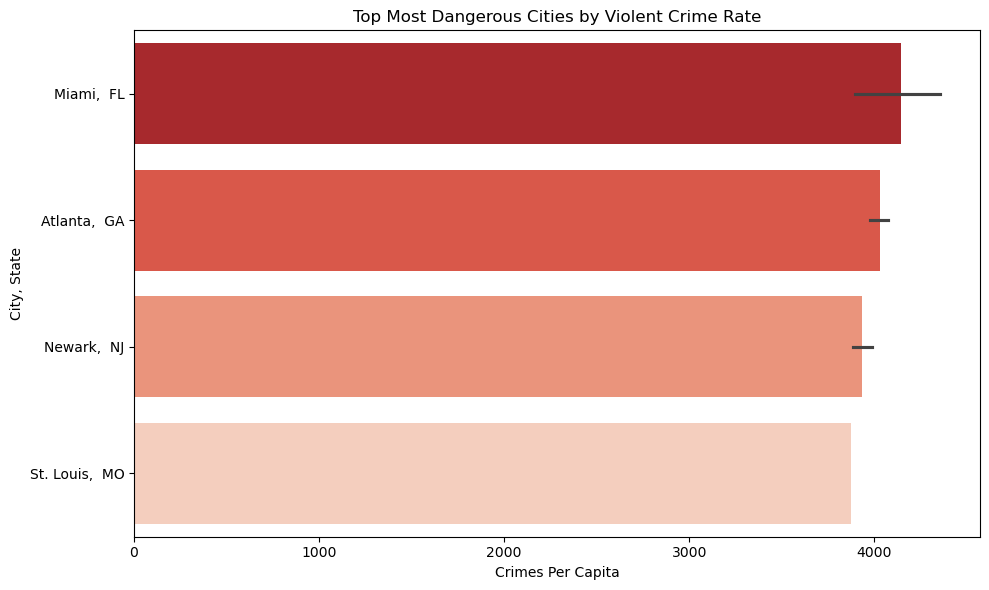

In [6]:
top10 = (
    df.dropna(subset=['crimes_percapita'])
      .nlargest(10, 'crimes_percapita')[['city', 'state', 'crimes_percapita']]
)

top10['city_state'] = top10['city'] + ', ' + top10['state']

plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='crimes_percapita', y='city_state', palette='Reds_r')
plt.title('Top Most Dangerous Cities by Violent Crime Rate')
plt.xlabel('Crimes Per Capita')
plt.ylabel('City, State')
plt.tight_layout()
plt.show()


# 2. Data analysis

In [34]:
df

report_year            city state agency_code  population  \
0            1975     Albuquerque    NM     NM00101    286238.0   
1            1975       Arlington    TX     TX22001    112478.0   
2            1975         Atlanta    GA     GAAPD00    490584.0   
3            1975          Aurora    CO     CO00101    116656.0   
4            1975          Austin    TX     TX22701    300400.0   
...           ...             ...   ...         ...         ...   
2823         2015          Tucson    AZ     AZ01003    529675.0   
2824         2015           Tulsa    OK     OK07205    401520.0   
2825         2015  Virginia Beach    VA     VA12800    452797.0   
2826         2015      Washington    DC     DCMPD00    672228.0   
2827         2015         Wichita    KS     KS08703    389824.0   

      violent_crimes  homicides  rapes  assaults  robberies months_reported  \
0             2383.0       30.0  181.0    1353.0      819.0            12.0   
1              278.0        5.0   28.0     132.0      113.0            12.0   
2             8033.0      185.0  443.0    3518.0     3887.0            12.0   
3              611.0        7.0   44.0     389.0      171.0            12.0   
4             1215.0       33.0  190.0     463.0      529.0            12.0   
...              ...        ...    ...       ...        ...             ...   
2823          3472.0       31.0  422.0    1960.0     1059.0   Not Available   
2824          3628.0       55.0  365.0    2354.0      854.0   Not Available   
2825           626.0       19.0  103.0     234.0      270.0   Not Available   
2826          8084.0      162.0  494.0    4024.0     3404.0   Not Available   
2827          3839.0       27.0  349.0    2730.0      733.0   Not Available   

      crimes_percapita  homicides_percapita  rapes_percapita  \
0               832.52                10.48            63.23   
1               247.16                 4.45            24.89   
2              1637.44                37.71            90.30   
3               523.76                 6.00            37.72   
4               404.46                10.99            63.25   
...                ...                  ...              ...   
2823            655.50                 5.85            79.67   
2824            903.57                13.70            90.90   
2825            138.25                 4.20            22.75   
2826           1202.57                24.10            73.49   
2827            984.80                 6.93            89.53   

      assaults_percapita  robberies_percapita  
0                 472.68               286.13  
1                 117.36               100.46  
2                 717.10               792.32  
3                 333.46               146.58  
4                 154.13               176.10  
...                  ...                  ...  
2823              370.04               199.93  
2824              586.27               212.69  
2825               51.68                59.63  
2826              598.61               506.38  
2827              700.32               188.03  

[2753 rows x 16 columns]

# Detecting outliers

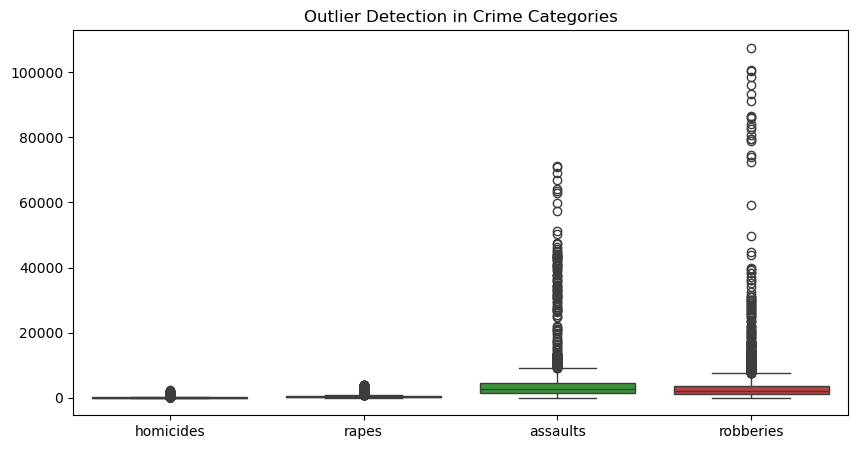

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=df[[ 'homicides', 'rapes', 'assaults', 'robberies']])
plt.title('Outlier Detection in Crime Categories')
plt.show()


In [29]:
#write a function to make interactive plots using plotly express

def plot_line(x, y, df):
    grouped_data = df.groupby(x)[y].sum().reset_index()
    #x = grouping factor
    #y = column that will be aggregated on
    fig = px.line(grouped_data, 
                  x=x, 
                  y=y,
                  labels={'report_year': 'Year', y: f'Number of {y}'},
                  markers=True,
                  title = f'Count of {y} over reported years',
                  width=800, height=600)
    fig.show()

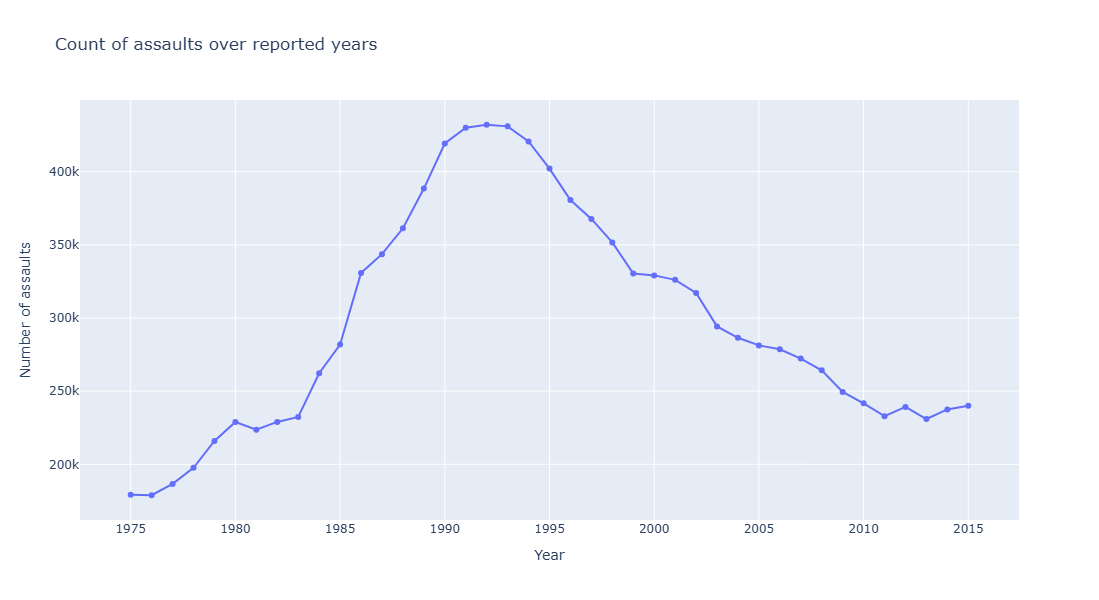

In [30]:
p1=plot_line('report_year','assaults',df)
p1








###   Insights 
There doesn’t seem to be a sharp peak but the numbers for reported assault cases are the highest between 1990 and 1995 after which the cases only drop

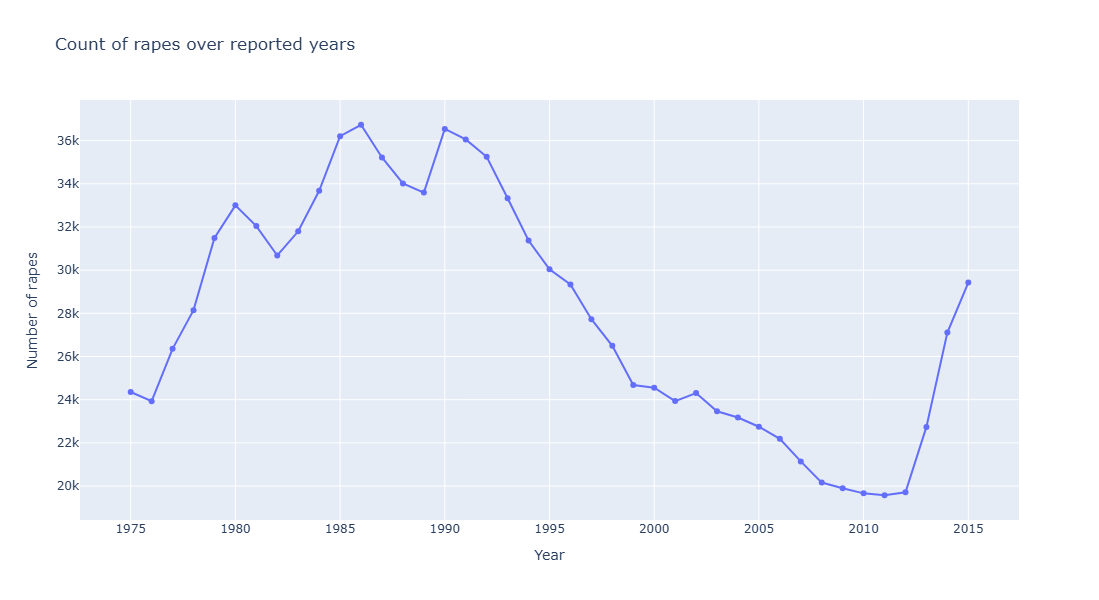

In [31]:
p2= plot_line('report_year','rapes',df)
p2


- The reported cases of homicide peaked in 1991 after which they only seem to decline.

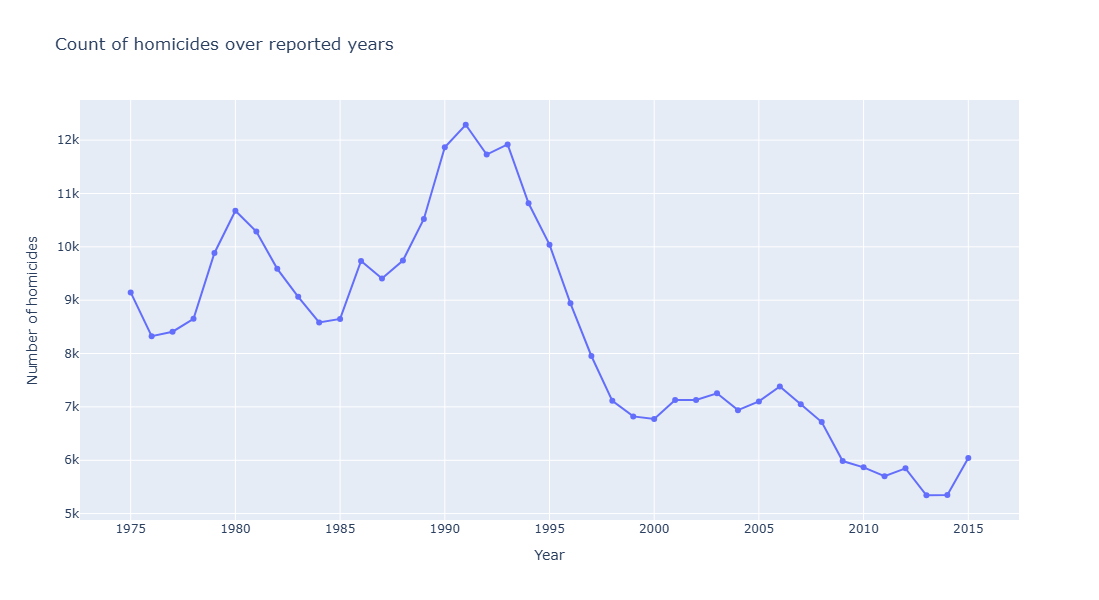

In [32]:
p3 = plot_line('report_year','homicides',df)
p3

- The reported cases of homicide peaked in 1991 after which they only seem to decline

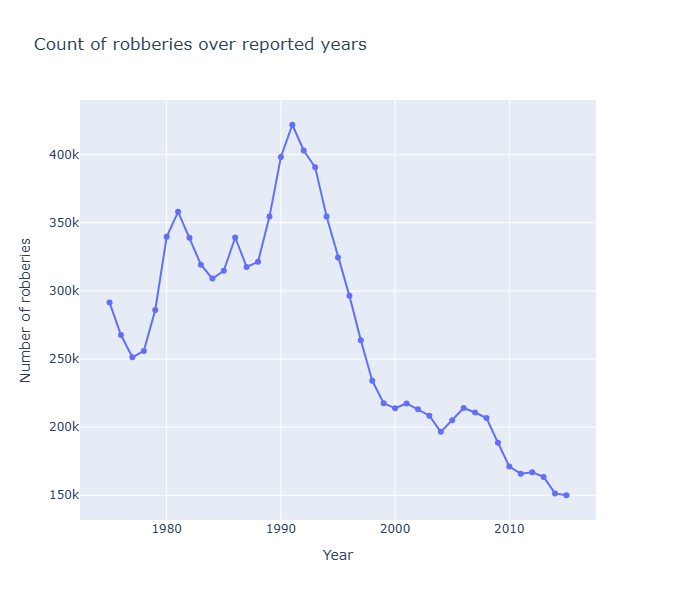

In [33]:
p4 = plot_line('report_year','robberies',df)
p4

- The reported cases for robberies peaked in 1991 after which they only seem to decline

# Uni variate analysis

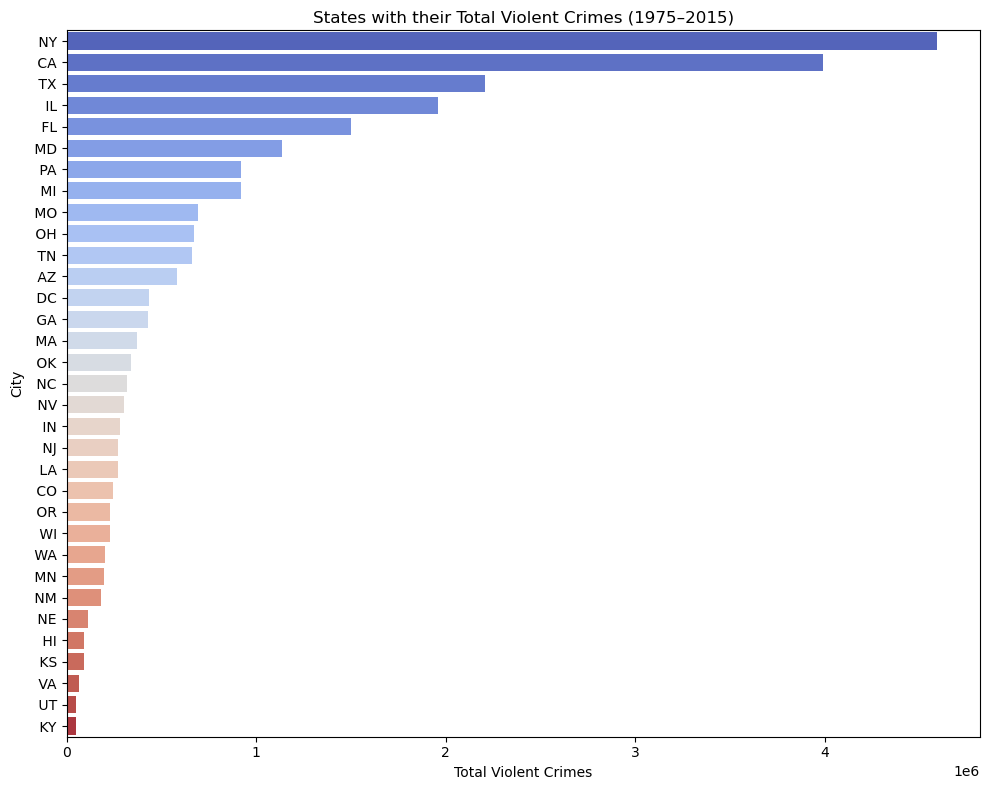

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by city (agency_jurisdiction) and sum violent crimes
city_crimes = df.groupby('state')['violent_crimes'].sum().reset_index()

# Step 2: Sort to get top cities
city_crimes = city_crimes.sort_values(by='violent_crimes', ascending=False)

# Step 3: Visualize
plt.figure(figsize=(10, 8))
sns.barplot(
    data=city_crimes,
    x='violent_crimes',
    y='state',
    palette='coolwarm'
)
plt.title('States with their Total Violent Crimes (1975–2015)')
plt.xlabel('Total Violent Crimes')
plt.ylabel('City')
plt.tight_layout()
plt.show()


### Insights
- New York City clearly has the highest number of violent crimes, far more than any other city.
- Los Angeles, Chicago, Detroit, Houston, and Philadelphia also show very high crime totals, but still much lower than New York.
- After the top few cities, there’s a sharp drop — most other cities have significantly fewer violent crimes.
- The majority of smaller or medium-sized cities (like Raleigh, Louisville, or Virginia Beach) have much lower crime totals.
- This pattern suggests that population size and urban density may strongly influence total crime — larger, busier cities experience more violent crimes overall.


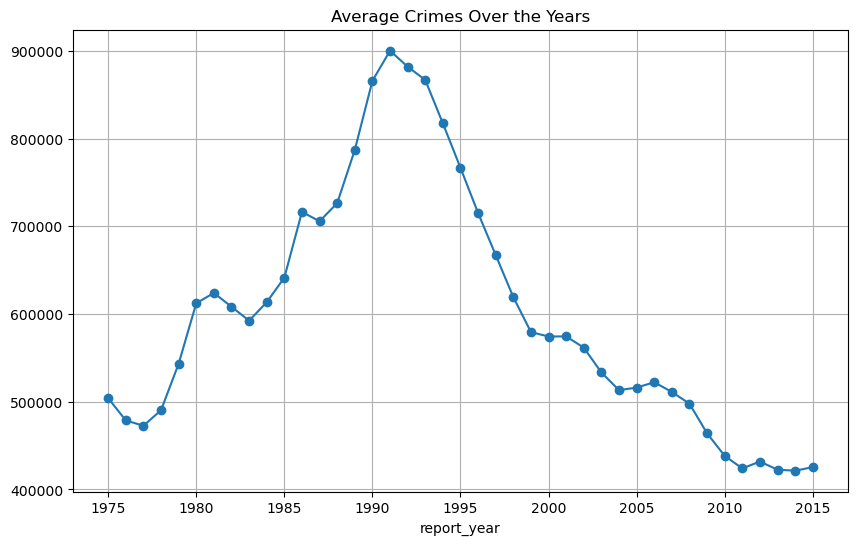

In [92]:

# Step 5: Trend Analysis Over Years-
plt.figure(figsize=(10,6))
df.groupby('report_year')['violent_crimes'].sum().plot(marker='o')
plt.title('Average Crimes Over the Years')
plt.grid()
plt.show()

## Insights
Violent crimes were very high around the early 1990s but have gone down a lot since then.
The data suggests that cities have become safer over time, especially after the mid-90s.

###  which crime is most frequently occurs accross all cites

<Axes: title={'center': 'Crime Type Distribution'}>

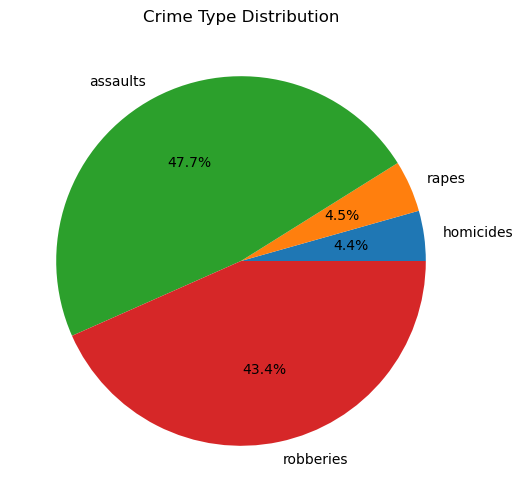

In [41]:
# which crime is most frequently occurs accross all cites
#uni
# cat- num
crime_types = ['homicides', 'rapes', 'assaults', 'robberies']
df[crime_types].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Crime Type Distribution')


## Insight
- Assaults and robberies are most common crimes among all cites


# Bivariate Analysis

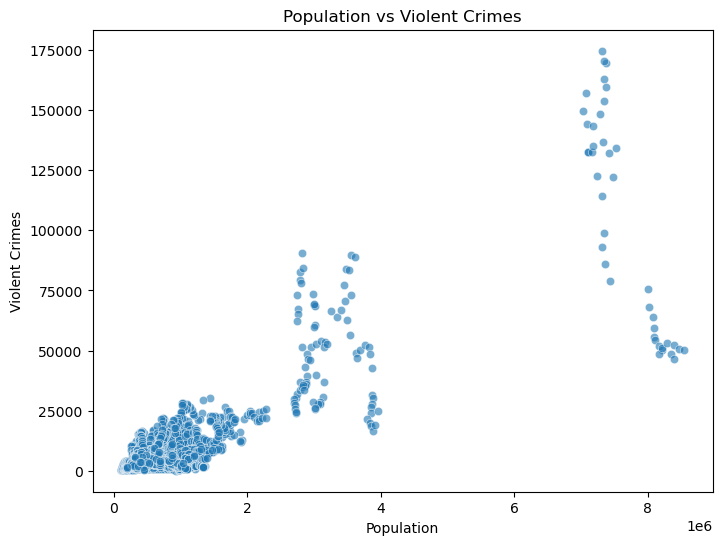

In [49]:
# Step 6: Comparative Analysis Between Variables
# ---------------------------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='population', y='violent_crimes', alpha=0.6)
plt.title('Population vs Violent Crimes')
plt.xlabel('Population')
plt.ylabel('Violent Crimes')
plt.show()


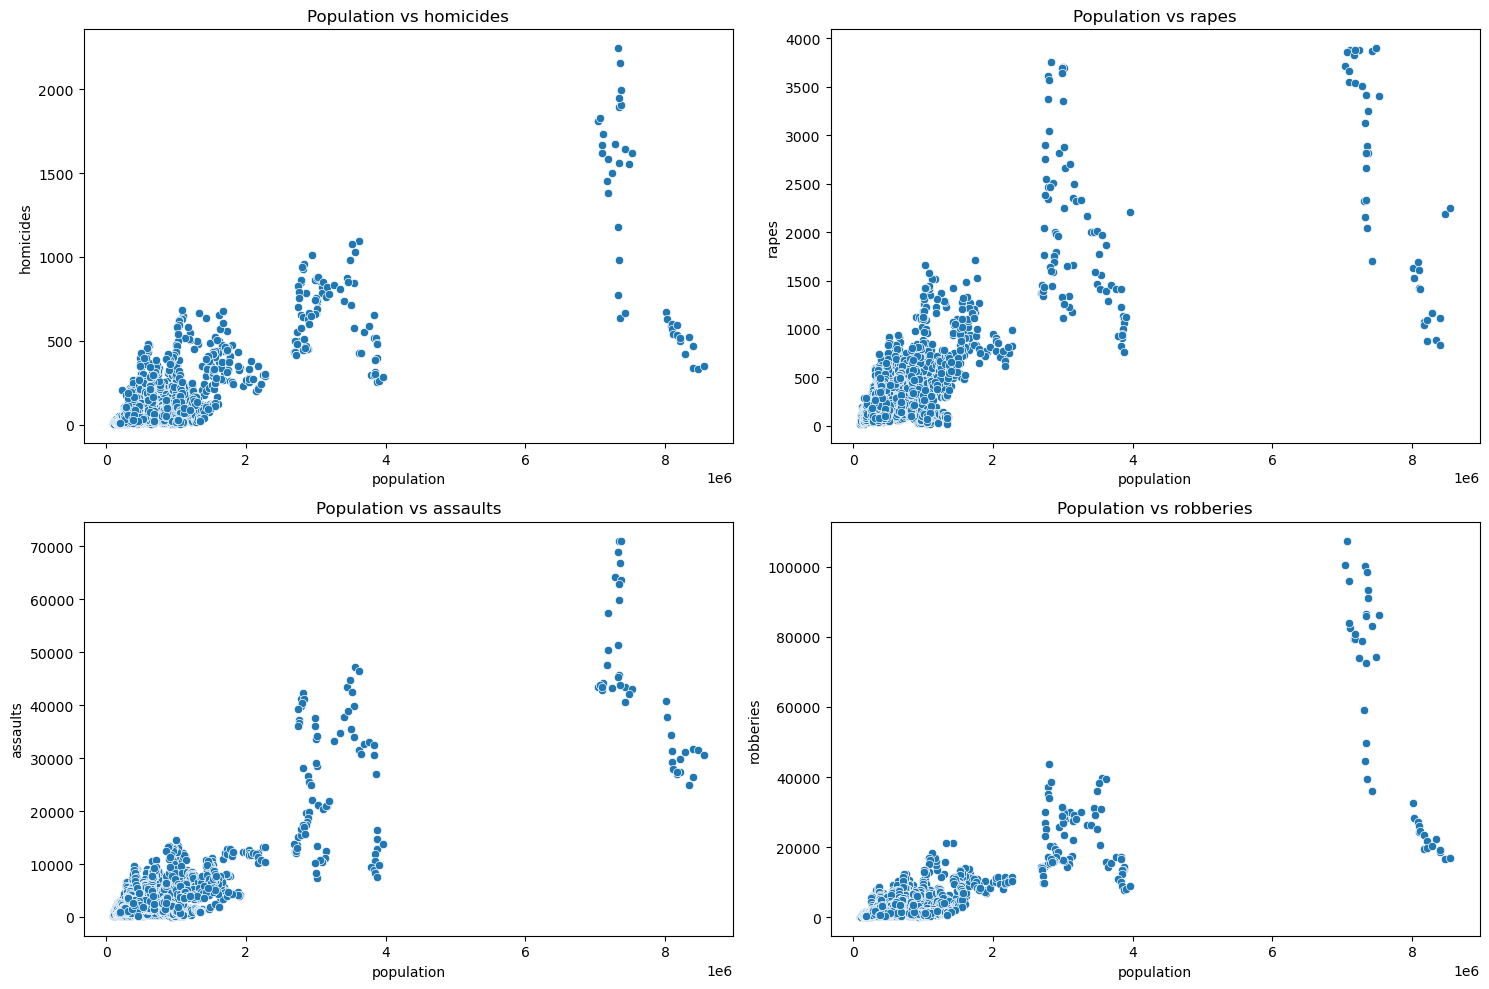

In [25]:
crime_cols = ['homicides','rapes','assaults','robberies']

plt.figure(figsize=(15,10))
for i, col in enumerate(crime_cols,1):
    plt.subplot(2,2,i)
    sns.scatterplot(x=df['population'], y=df[col])
    plt.title(f"Population vs {col}")
plt.tight_layout()
plt.show()


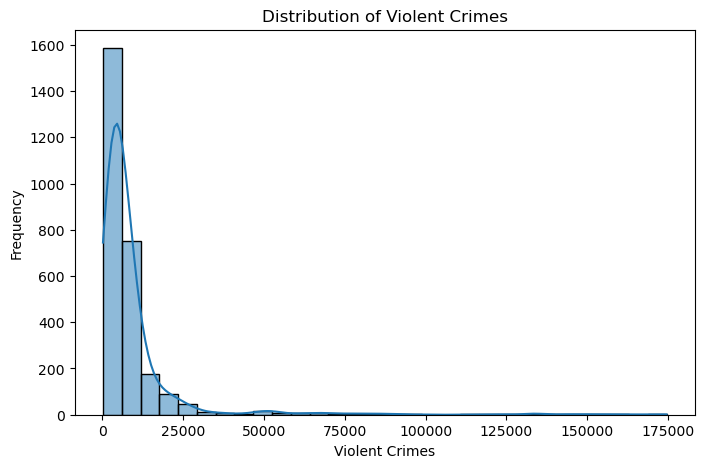

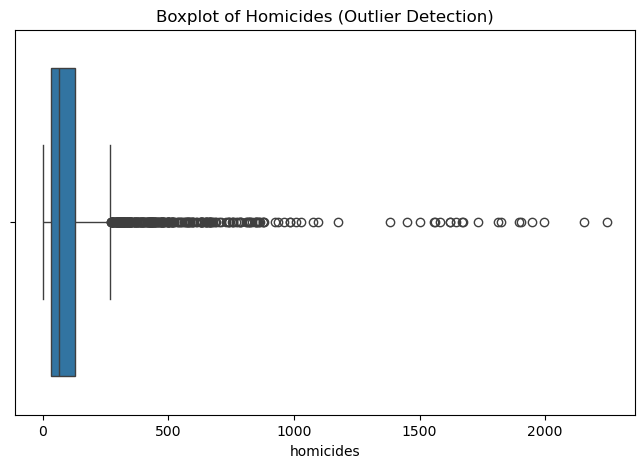

In [28]:
# Step 2: Univariate Analysis (Visual)

plt.figure(figsize=(8,5))
sns.histplot(df['violent_crimes'], bins=30, kde=True)
plt.title('Distribution of Violent Crimes')
plt.xlabel('Violent Crimes')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['homicides'])
plt.title('Boxplot of Homicides (Outlier Detection)')
plt.show()


# Multivariate

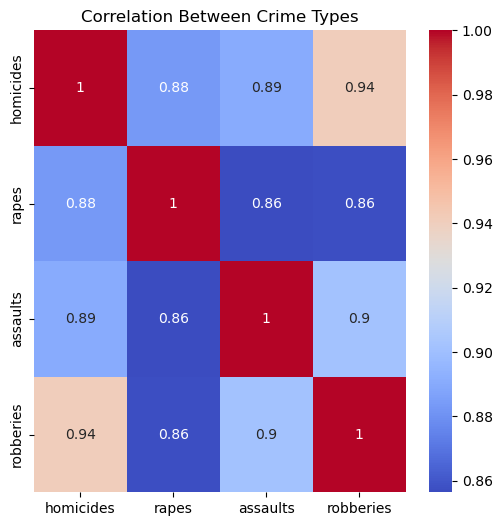

In [42]:
# Step 4: Correlation Heatmap (Numerical Relationships)
# ---------------------------------------------------------------
plt.figure(figsize=(6,6))
sns.heatmap(df[crime_types].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Crime Types')
plt.show()


<Axes: title={'center': 'Crime Type Trends Over Years'}, xlabel='report_year'>

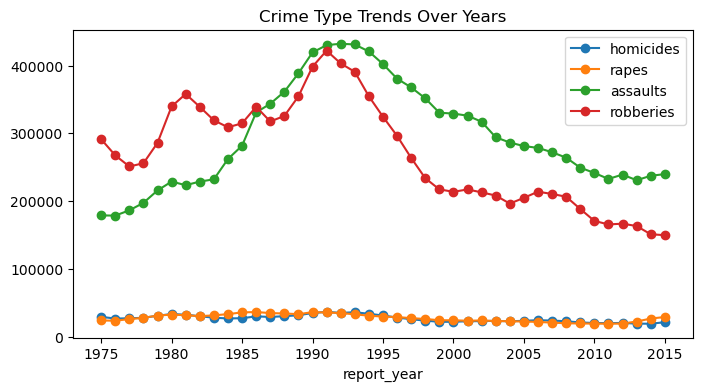

In [58]:
#Are there trends in specific crime types over time?
#multivariate
df.groupby('report_year')[['homicides','rapes','assaults','robberies']].sum().plot(figsize=(8,4), marker='o', title='Crime Type Trends Over Years')


### things we notice
- **Population and Crimes:**
Population has a strong positive link with all major crime types — meaning, **as population increases, crimes also rise**.

- **Crimes Related to Each Other:**
Different types of crimes (like assaults, robberies, rapes, and homicides) are **highly connected** — when one type goes up, others usually go up too.

- **Crimes per Capita:**
This one doesn’t depend much on population — it varies differently across cities.

- **Overall Pattern:**
Bigger cities tend to have more total crimes, and most crime types move together.
So, when a city sees a rise in one kind of violent crime, it’s likely others also increase.


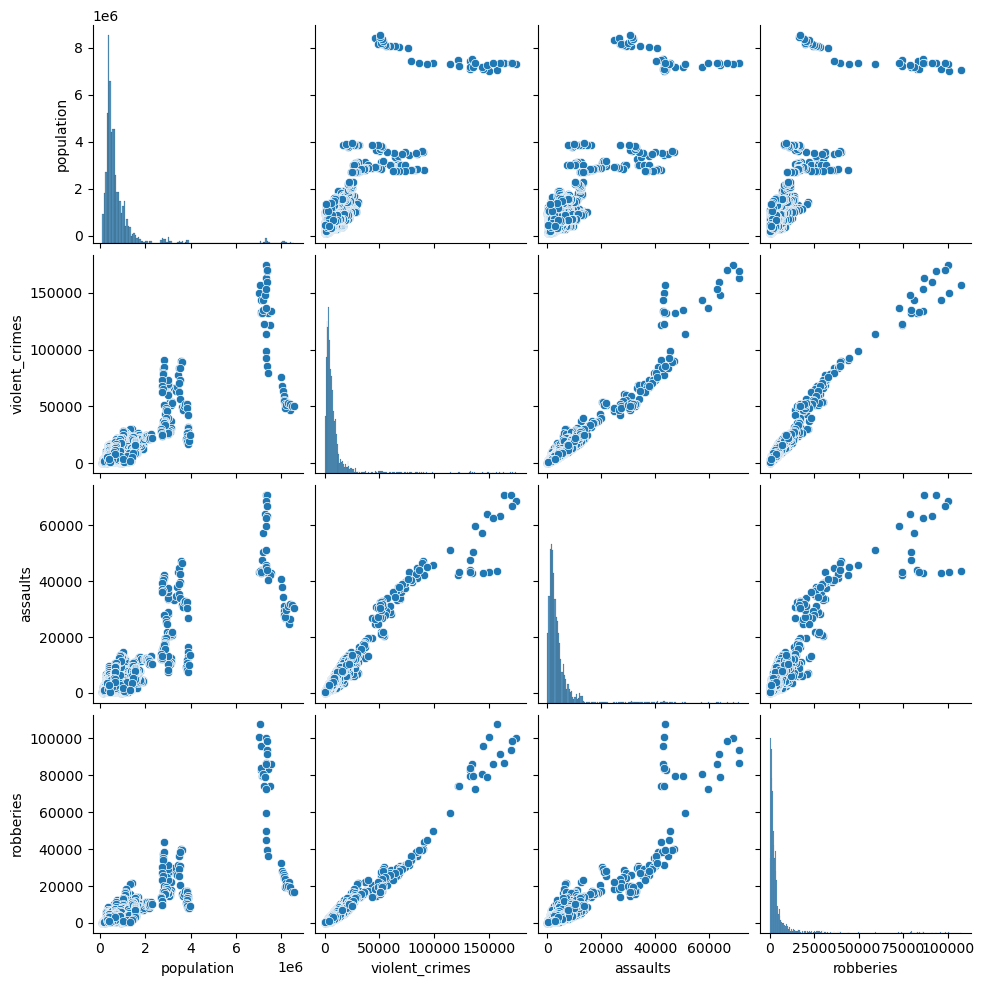

In [28]:
sns.pairplot(df[['population','violent_crimes','assaults','robberies']])
plt.show()


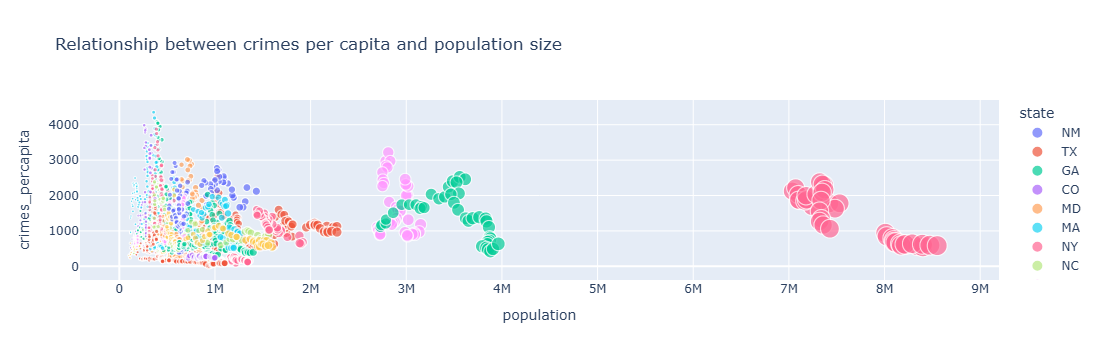

In [37]:
fig5 = px.scatter(df, x='population', y='crimes_percapita', 
                 color='state',
                 size='population',
                 title='Relationship between crimes per capita and population size'
                 )
fig5.show()

In [85]:
crime_by_city = df.groupby('agency_jurisdiction')['violent_crimes'].sum().sort_values(ascending=False)
crime_by_city.head(10)


agency_jurisdiction
New York City, NY        4263284.0
Los Angeles, CA          1979166.0
Chicago, IL              1960886.0
Detroit, MI               918003.0
Houston, TX               819539.0
Philadelphia, PA          763201.0
Baltimore, MD             600630.0
Dallas, TX                590468.0
Miami-Dade County, FL     500061.0
Washington, DC            433937.0
Name: violent_crimes, dtype: float64

# See how crime rates change over time

## Plot per-capita crime trends to see if violence is rising or falling

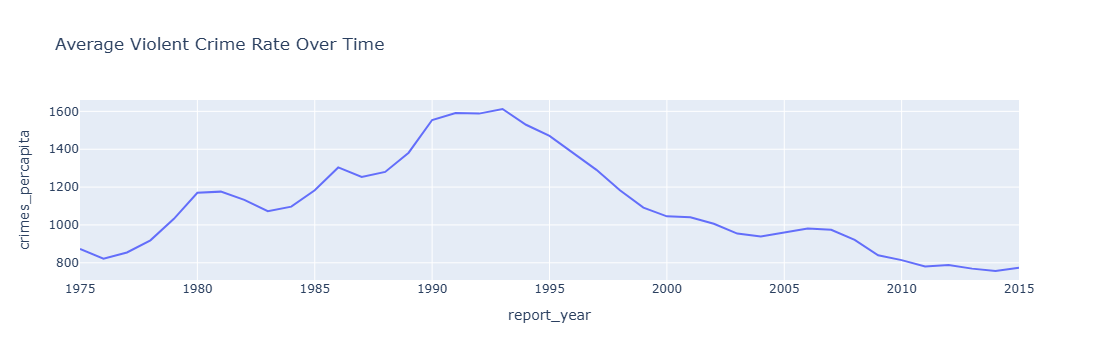

In [38]:
import plotly.express as px
trend = df.groupby('report_year')['crimes_percapita'].mean().reset_index()
px.line(trend, x='report_year', y='crimes_percapita', title='Average Violent Crime Rate Over Time')


7️⃣ Are there correlations between different types of crimes?

Expected Answer: E.g., high assaults may correlate with high robberies; correlation heatmap.

Type: Numerical → Numerical (correlation analysis)

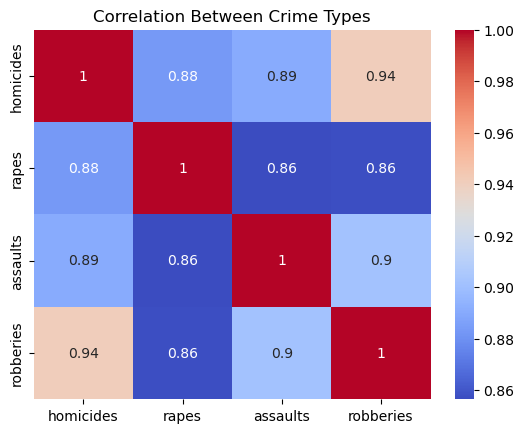

In [101]:
sns.heatmap(df[crime_types].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Crime Types')
plt.show()


 # 9️⃣ Which cities have the highest crime rates per capita?

Expected Answer: Adjusted crime rankings considering population size.

Type: Bivariate (numerical → numerical)

In [103]:
crime_trend = df.groupby('report_year')['violent_crimes'].sum()
crime_trend[crime_trend > crime_trend.mean() + 2*crime_trend.std()]  # unusually high
crime_trend[crime_trend < crime_trend.mean() - 2*crime_trend.std()]  # unusually low


Series([], Name: violent_crimes, dtype: float64)

In [43]:
df['violent_crimes_percapita'] = df['violent_crimes'] / df['population']
df[['city', 'violent_crimes_percapita']].sort_values(by='violent_crimes_percapita', ascending=False).head(10)


city  violent_crimes_percapita
1069      Miami                  0.043528
1138      Miami                  0.041908
1037    Atlanta                  0.040854
1106    Atlanta                  0.040505
1244    Atlanta                  0.040412
1422     Newark                  0.039853
968     Atlanta                  0.039514
1276      Miami                  0.038930
1077     Newark                  0.038820
1302  St. Louis                  0.038749

3️⃣ How does violent crime per capita vary by city size?

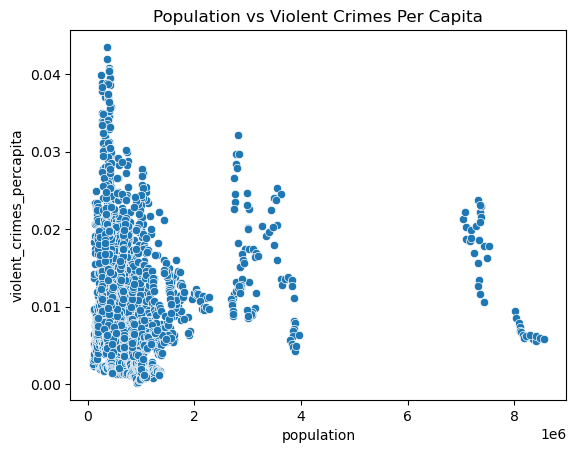

In [108]:
df['violent_crimes_percapita'] = df['violent_crimes'] / df['population']
sns.(data=df, x='population', y='violent_crimes_percapita',color=')
plt.title('Population vs Violent Crimes Per Capita')
plt.show()
                #bi variate


# 4️⃣ What’s the ratio of different crime types in each city?

In [109]:
city_crime_ratio = df.groupby('agency_jurisdiction')[['homicides','rapes','assaults','robberies']].sum()
city_crime_ratio.div(city_crime_ratio.sum(axis=1), axis=0).head(10)  # first 10 cities


homicides     rapes  assaults  robberies
agency_jurisdiction                                           
Albuquerque, NM        0.009504  0.059261  0.654800   0.276435
Arlington, TX          0.007938  0.073578  0.619206   0.299278
Atlanta, GA            0.014564  0.039933  0.547528   0.397975
Aurora, CO             0.007654  0.083562  0.662762   0.246022
Austin, TX             0.012594  0.098503  0.510825   0.378078
Baltimore County, MD   0.005086  0.033526  0.686257   0.275131
Baltimore, MD          0.017603  0.029952  0.459915   0.492530
Boston, MA             0.008133  0.042346  0.493526   0.455995
Buffalo, NY            0.012443  0.057047  0.473991   0.456519
Charlotte, NC          0.010786  0.042736  0.612688   0.333790

# 5️⃣ Are some cities consistently high-crime over all years?

In [110]:
high_crime_cities = df.groupby('agency_jurisdiction')['violent_crimes'].mean().sort_values(ascending=False)
high_crime_cities.head(10)


agency_jurisdiction
New York City, NY        103982.536585
Los Angeles, CA           48272.341463
Chicago, IL               47826.487805
Detroit, MI               22390.317073
Houston, TX               19988.756098
Philadelphia, PA          18614.658537
Baltimore, MD             14649.512195
Dallas, TX                14401.658537
Miami-Dade County, FL     12196.609756
Washington, DC            10583.829268
Name: violent_crimes, dtype: float64

# 6️⃣ Which year had the highest total homicides or rapes?

In [112]:
df.groupby('report_year')[['assaults','robberies']].sum().sort_values(by='assaults', ascending=False).head(1)
df.groupby('report_year')[['assaults','robberies']].sum().sort_values(by='robberies', ascending=False).head(1)


assaults  robberies
report_year                     
1991         430026.0   421944.0

In [113]:
df.groupby('report_year')[['homicides','rapes']].sum().sort_values(by='homicides', ascending=False).head(1)
df.groupby('report_year')[['homicides','rapes']].sum().sort_values(by='rapes', ascending=False).head(1)


homicides    rapes
report_year                    
1986            9734.0  36736.0

In [49]:
df['months_reported'].dtype


dtype('float64')

 # 9️⃣ How consistent are per capita crime rates year to year per city?

In [50]:
percapita_trend = df.groupby(['city','report_year'])['violent_crimes_percapita'].mean().unstack()
percapita_trend.head()  # shows trend for first few cities


report_year      1975      1976      1977      1978      1979      1980  \
city                                                                      
Albuquerque  0.008325  0.008280  0.008175  0.008340  0.008867  0.008545   
Arlington    0.002472  0.002550  0.003443  0.003696  0.004806  0.005000   
Atlanta      0.016374  0.016464  0.017250  0.019397  0.025325  0.026215   
Aurora       0.005238  0.004136  0.004264  0.006319  0.007696  0.008076   
Austin       0.004045  0.004219  0.003914  0.004262  0.004427  0.005017   

report_year      1981      1982      1983      1984  ...      2006      2007  \
city                                                 ...                       
Albuquerque  0.008862  0.007708  0.008317  0.010144  ...  0.009083  0.009900   
Arlington    0.004164  0.003492  0.003271  0.003995  ...  0.007312  0.006956   
Atlanta      0.024351  0.023772  0.020787  0.023761  ...  0.015537  0.016238   
Aurora       0.008821  0.008399  0.009886  0.009531  ...  0.006132  0.005478   
Austin       0.004320  0.004137  0.004025  0.004278  ...  0.005153  0.005400   

report_year      2008      2009      2010      2011      2012      2013  \
city                                                                      
Albuquerque  0.008945  0.007693  0.007861  0.007627  0.007497  0.007749   
Arlington    0.006019  0.006146  0.005268  0.005022  0.005033  0.004850   
Atlanta      0.013889  0.011501  0.013688  0.014328  0.013790  0.012230   
Aurora       0.005125  0.004691  0.004457  0.004414  0.004155  0.004160   
Austin       0.005222  0.005233  0.004795  0.004300  0.004088  0.003635   

report_year      2014      2015  
city                             
Albuquerque  0.008828  0.009658  
Arlington    0.004841  0.005021  
Atlanta      0.012274  0.011196  
Aurora       0.004075  0.004608  
Austin       0.003962  0.003725  

[5 rows x 41 columns]

### things we notice
- The table shows how violent crime rates per person have changed over the years for each city.
Each row = one city, each column = one year, and the numbers show the average crime rate per person.

# 🔟 Which agencies have unusual crime patterns compared to the average?

In [117]:
agency_avg = df.groupby('agency_jurisdiction')[['homicides','rapes','assaults','robberies']].mean()
agency_avg[agency_avg['homicides'] > agency_avg['homicides'].mean()*2]  # unusually high homicides


homicides        rapes      assaults     robberies
agency_jurisdiction                                                      
Baltimore, MD         257.878049   438.780488   6737.536585   7215.317073
Chicago, IL           676.268293  2200.219512  23214.756098  21735.243902
Dallas, TX            253.365854   822.146341   6979.219512   6346.926829
Detroit, MI           475.536585   996.512195  10266.829268  10651.439024
Houston, TX           370.219512   980.658537   8957.951220   9679.926829
Los Angeles, CA       634.121951  1701.170732  25066.609756  20870.439024
New York City, NY    1150.634146  2482.804878  43611.341463  56737.756098
Philadelphia, PA      355.853659   910.195122   7373.804878   9974.804878

### things we notice
These are the most violent cities in your dataset, where the average yearly number of homicides is more than twice the national average.
They also tend to have high levels of all other violent crimes, not just homicides.
Most are large urban centers where population density, poverty, and social issues may contribute to higher crime rates.

# count of crime in each state?

In [31]:
violence_raw_count = df.groupby('state')['violent_crimes'].sum() \
.sort_values(ascending=False).head(10)

violence_raw_count

state
NY    4590104.0
CA    3990220.0
TX    2209217.0
IL    1960886.0
FL    1503422.0
MD    1136606.0
PA     921855.0
MI     918003.0
MO     691160.0
OH     670595.0
Name: violent_crimes, dtype: float64

# ➡️Lists the top 10 most dangerous cities by rate.

In [45]:
# ➡️ Lists the top 10 most dangerous cities by rate.
# univariate 
c=df.nlargest(10, 'crimes_percapita')[['city', 'state', 'crimes_percapita']]
c


city state  crimes_percapita
1069      Miami    FL           4352.83
1138      Miami    FL           4190.84
1037    Atlanta    GA           4085.36
1106    Atlanta    GA           4050.51
1244    Atlanta    GA           4041.18
1422     Newark    NJ           3985.29
968     Atlanta    GA           3951.40
1276      Miami    FL           3892.96
1077     Newark    NJ           3881.97
1302  St. Louis    MO           3874.92

In [66]:
c=df.groupby('city')['crimes_percapita'].mean().sort_values(ascending=False).head(10).reset_index()
c

city  crimes_percapita
0     Atlanta       2425.925610
1   St. Louis       2349.463902
2       Miami       2346.691951
3      Newark       2237.503171
4     Detroit       2218.484878
5   Baltimore       2037.328293
6       Tampa       1893.905000
7     Oakland       1812.991951
8  Washington       1755.475854
9     Orlando       1718.012683

# relationship with populatation crime

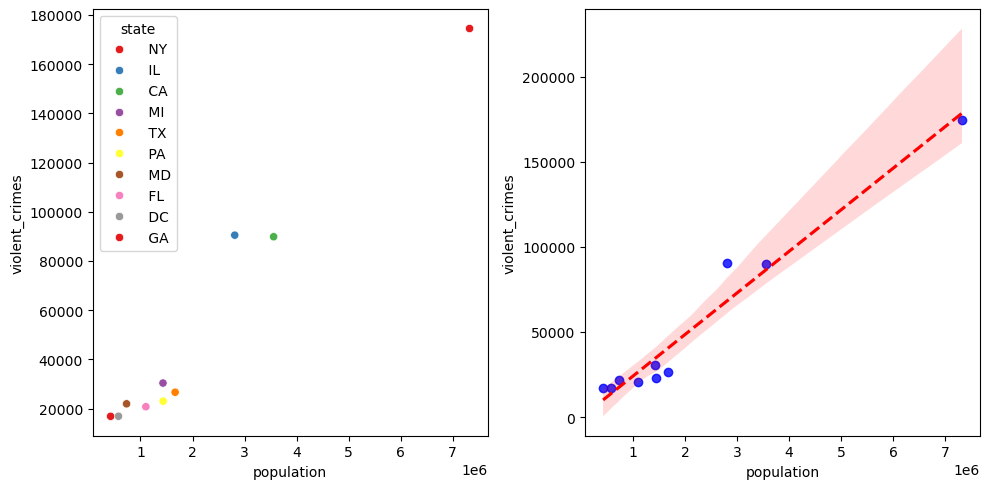

In [38]:
ig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x='population',
                y='violent_crimes',
                hue='state',
                data=top_states.nlargest(10,'violent_crimes'),
                ax=ax[0],
                palette='Set1')

sns.regplot(x='population', 
            y='violent_crimes', 
            data=top_states.nlargest(10,'violent_crimes'),
            scatter_kws={'color': 'blue'},  # Set the color of the scatterplot points
            line_kws={'color': 'red', 'linestyle':'--'},
            ax=ax[1]) 
            
plt.tight_layout()   
plt.show()

# topstates with their crime data 

In [ ]:
top_states = df.loc[state_grouped].sort_values(by='violent_crimes',ascending=False)

In [37]:
state_grouped = df.groupby(['state'])['violent_crimes'].idxmax()
top_states = df.loc[state_grouped].sort_values(by='violent_crimes',ascending=False)
top_7 = top_states.nlargest(7, 'violent_crimes')
top_7


report_year           city state agency_code  population  \
1076         1990  New York City    NY     NY03030   7322564.0   
1114         1991        Chicago    IL     ILCPD00   2811478.0   
1133         1991    Los Angeles    CA     CA01942   3558316.0   
16           1975        Detroit    MI     MI82349   1432444.0   
1126         1991        Houston    TX     TXHPD00   1665756.0   
1703         1999   Philadelphia    PA     PAPEP00   1435382.0   
1248         1993      Baltimore    MD     MDBPD00    732968.0   

      violent_crimes  homicides   rapes  assaults  robberies months_reported  \
1076        174542.0     2245.0  3126.0   68891.0   100280.0            12.0   
1114         90520.0      925.0  3575.0   42237.0    43783.0            12.0   
1133         89875.0     1027.0  1966.0   47104.0    39778.0            12.0   
16           30387.0      633.0  1424.0    7013.0    21317.0            12.0   
1126         26651.0      608.0  1213.0   10947.0    13883.0            12.0   
1703         23031.0      292.0   934.0   10701.0    11104.0            12.0   
1248         21945.0      353.0   668.0    8548.0    12376.0            12.0   

      crimes_percapita  homicides_percapita  rapes_percapita  \
1076           2383.62                30.66            42.69   
1114           3219.66                32.90           127.16   
1133           2525.77                28.86            55.25   
16             2121.34                44.19            99.41   
1126           1599.93                36.50            72.82   
1703           1604.52                20.34            65.07   
1248           2993.99                48.16            91.14   

      assaults_percapita  robberies_percapita population_group  \
1076              940.80              1369.47             Mega   
1114             1502.31              1557.29       Very Large   
1133             1323.77              1117.89       Very Large   
16                489.58              1488.16       Very Large   
1126              657.18               833.44       Very Large   
1703              745.52               773.59       Very Large   
1248             1166.22              1688.48            Large   

      violent_crimes_percapita  
1076                  0.023836  
1114                  0.032197  
1133                  0.025258  
16                    0.021213  
1126                  0.015999  
1703                  0.016045  
1248                  0.029940